# Problem 4.2

In [1]:
# imports
import pandas as pd
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


In [2]:
# tested for 159, 101, 145, 201
image_num = 159

In [3]:
df = pd.read_csv('q4-resources/4-2/CSV/TLBR_{}.csv'.format(image_num))
df

,Unnamed: 0,Top-Left,Bottom-Right,Id
0,0,"[365, 291]","[783, 362]",0
1,1,"[802, 284]","[858, 342]",1
2,2,"[873, 291]","[931, 345]",2
3,3,"[1972, 280]","[2062, 335]",3
4,4,"[363, 455]","[464, 520]",4
...,...,...,...,...
124,124,"[355, 3104]","[706, 3179]",124
125,125,"[728, 3090]","[1201, 3162]",125
126,126,"[1221, 3093]","[1259, 3148]",126
127,127,"[1279, 3090]","[1465, 3155]",127


In [4]:
img = cv2.imread('q4-resources/4-2/images/{}.jpg'.format(image_num))

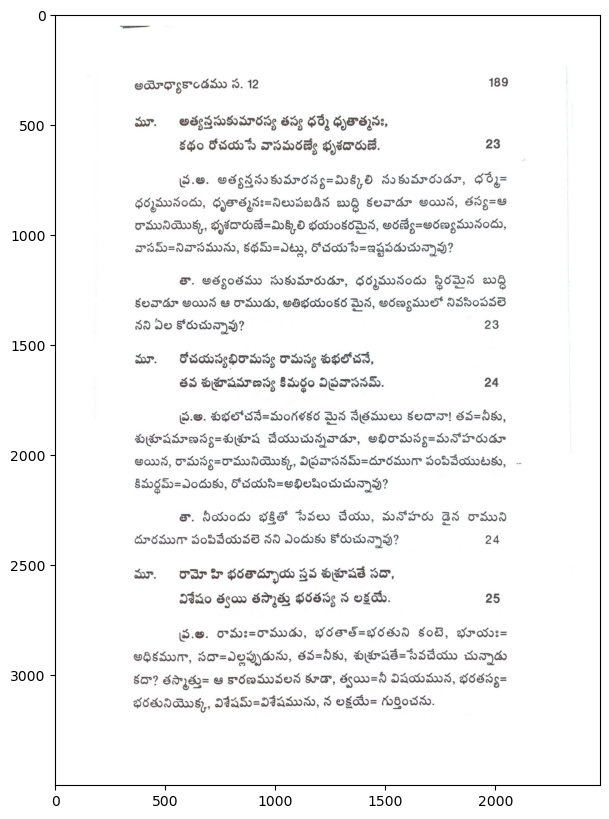

In [5]:
plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.show()

In [6]:
def visualize_bboxes(img):
    img_2 = img.copy()
    for index, rows in df.iterrows():
        top_left = (int(rows['Top-Left'].split(',')[0][1:]),int(rows['Top-Left'].split(',')[1][:-1]))
        bottom_right = (int(rows['Bottom-Right'].split(',')[0][1:]),int(rows['Bottom-Right'].split(',')[1][:-1]))
        cv2.rectangle(img_2, top_left, bottom_right, (255, 0, 0), 2)

    plt.figure(figsize=(10, 10))
    plt.imshow(img_2)
    plt.show()

In [7]:
def make_connections(image):

  image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

  image_with_boxes = image_rgb.copy()

  for index, row in euclidean.iterrows():
      left = int(row['Left'][0])
      right = int(row['Right'][0])
      top = int(row['Top'][1])
      bottom = int(row['Bottom'][1])
      box_id = int(row['Id'])

      width = right - left
      height = bottom - top

      top_left = (left, top)
      bottom_right = (right, bottom)

      cv2.rectangle(image_with_boxes, top_left, bottom_right, (255, 0, 0), 2)

      label_position = (left, top - 10)
      cv2.putText(image_with_boxes, str(box_id), label_position, cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1)

      top_adjacent_id = int(row['Top_Box'][1])
      bottom_adjacent_id = int(row['Bottom_Box'][1])
      left_adjacent_id = int(row['Left_Box'][1])
      right_adjacent_id = int(row['Right_Box'][1])

      if top_adjacent_id != 0:
          top_adjacent_row = euclidean[euclidean['Id'] == top_adjacent_id].iloc[0]
          top_adjacent_center = int(top_adjacent_row['Bottom'][0]) , int(top_adjacent_row['Bottom'][1])
          cv2.line(image_with_boxes, (int(left) + width // 2, int(top)), top_adjacent_center, (0, 255, 0), 2)

      if bottom_adjacent_id != 0:
          bottom_adjacent_row = euclidean[euclidean['Id'] == bottom_adjacent_id].iloc[0]
          bottom_adjacent_center = int(bottom_adjacent_row['Top'][0]) , int(bottom_adjacent_row['Top'][1])
          cv2.line(image_with_boxes, (int(left) + width // 2, int(bottom)), (int(bottom_adjacent_center[0]), int(bottom_adjacent_center[1])), (0, 255, 0), 2)

      if left_adjacent_id != 0:
          left_adjacent_row = euclidean[euclidean['Id'] == left_adjacent_id].iloc[0]
          left_adjacent_center = int(left_adjacent_row['Right'][0]) , int(left_adjacent_row['Right'][1])
          cv2.line(image_with_boxes, (int(left), int(top) + height // 2), (int(left_adjacent_center[0]), int(left_adjacent_center[1])), (0, 255, 0), 2)

      if right_adjacent_id != 0:
          right_adjacent_row = euclidean[euclidean['Id'] == right_adjacent_id].iloc[0]
          right_adjacent_center = int(right_adjacent_row['Left'][0]) , int(right_adjacent_row['Left'][1])
          cv2.line(image_with_boxes, (int(right), int(top) + height // 2), (int(right_adjacent_center[0]), int(right_adjacent_center[1])), (0, 255, 0), 2)

  return image_with_boxes

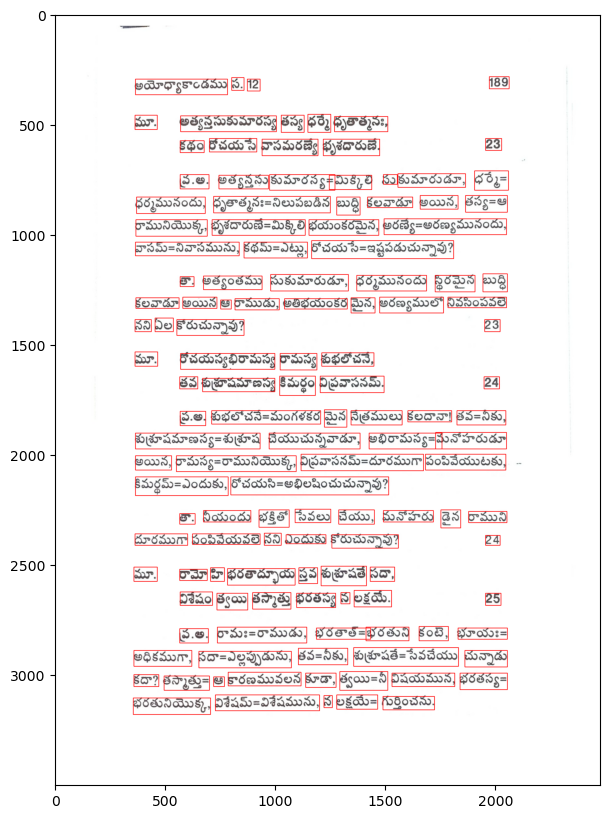

In [8]:
visualize_bboxes(img)

Thoughts
- GMM based on centers of bounding boxes
- get all elements within a cluster
- max distance shouldn't be like 10 times average distance; if yes, add new cluster

In [9]:
# retrieving the centers for all the words:

center_points = []

corners = []

for index, rows in df.iterrows():
    top_left = (int(rows['Top-Left'].split(',')[0][1:]),int(rows['Top-Left'].split(',')[1][:-1]))
    bottom_right = (int(rows['Bottom-Right'].split(',')[0][1:]),int(rows['Bottom-Right'].split(',')[1][:-1]))
        
    center_points.append([(top_left[0] + bottom_right[0])//2, (top_left[1] + bottom_right[1])//2])
        
    corners.append([top_left[0], bottom_right[0], top_left[1], bottom_right[1]])
    
center_points = np.array(center_points)

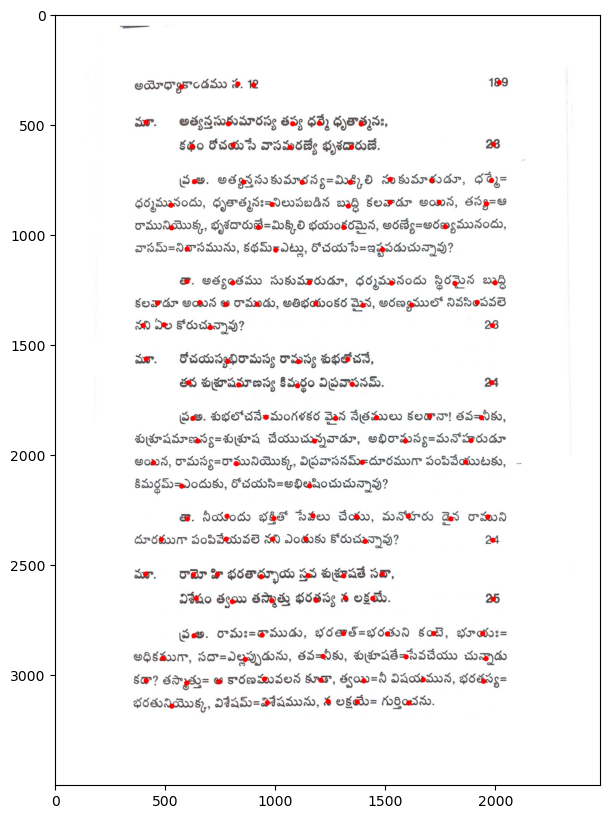

In [10]:
mid_pt_size = 12

img_2 = img.copy()
for center in center_points:
    cv2.circle(img_2, center, mid_pt_size, (255, 0, 0), -1)

plt.figure(figsize=(10, 10))
plt.imshow(img_2)

plt.show()

In [11]:
from scipy.cluster.hierarchy import dendrogram, linkage


In [12]:
tuned_centers = np.copy(center_points)

scaler = StandardScaler()
tuned_centers = scaler.fit_transform(tuned_centers)

tuned_centers[:, 1] *= 5

tuned_centers.shape

(129, 2)

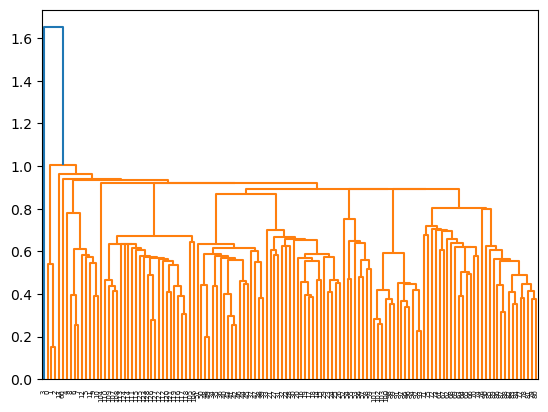

In [13]:
linkage_matrix = linkage(tuned_centers, method='single')
dendrogram(linkage_matrix)
plt.show()

In [14]:
from scipy.cluster.hierarchy import fcluster

threshold = 0.75
clusters = fcluster(linkage_matrix, threshold, criterion='distance')
clusters

array([ 1,  1,  1, 16,  3,  2,  2,  2,  2,  2,  2,  2,  2, 15,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  8,  7,  7,  7,  7,  7,  7,  7, 14, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 12, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 11, 11, 11, 11, 11,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,
        9,  9, 13,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4], dtype=int32)

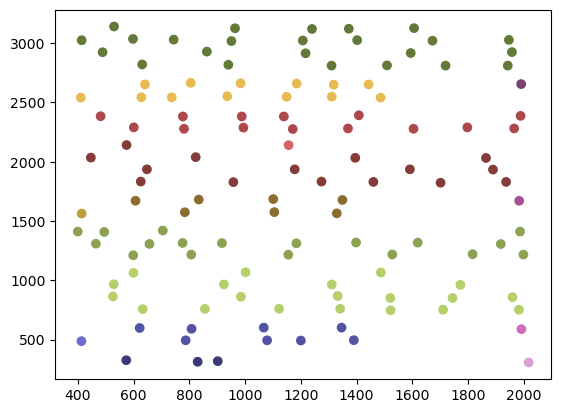

In [15]:
plt.scatter(center_points[:, 0], center_points[:, 1], c=clusters, cmap='tab20b')
plt.show()

/tmp/ipykernel_114701/67973021.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap('tab20b', len(np.unique(clusters)))


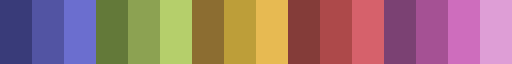

In [16]:
img_2 = img.copy()

colormap = plt.cm.get_cmap('tab20b', len(np.unique(clusters)))

colormap

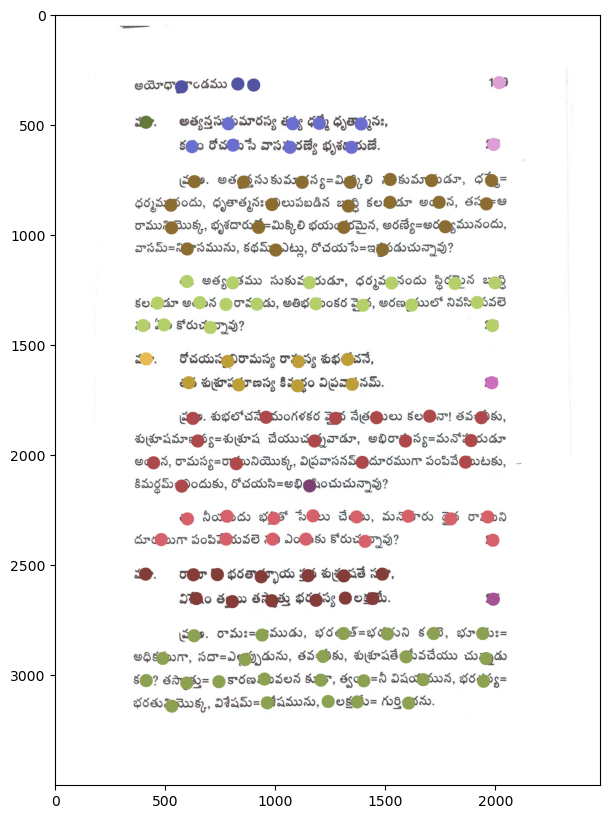

In [17]:
mid_pt_size = 30

img_2 = img.copy()

for i in range(len(center_points)):
    color = np.array(colormap(clusters[i])[:3]) * 255
    
    cv2.circle(img_2, center_points[i], mid_pt_size, color, -1)

plt.figure(figsize=(10, 10))
plt.imshow(img_2)

plt.show()

In [18]:
# implementing this code in a loop to find optimal threshold:

def opt_thresh(center_points):
    tuned_centers = np.copy(center_points)

    scaler = StandardScaler()
    tuned_centers = scaler.fit_transform(tuned_centers)

    tuned_centers[:, 1] *= 5
    
    linkage_matrix = linkage(tuned_centers, method='single')
    dendrogram(linkage_matrix)
    plt.show()
    
    min_num, max_num = 5, 300
    
    cur_thresh = 0
    
    for threshold in range(min_num, max_num):
        cur_thresh = threshold/100
        print(cur_thresh)
        
        clusters = fcluster(linkage_matrix, cur_thresh, criterion='distance')

        clusters_dict = {}
        
        for i, cluster in enumerate(clusters):
            if cluster not in clusters_dict:
                clusters_dict[cluster] = []  
            clusters_dict[cluster].append(i)
            
        avg_distance = 0
        max_intra_cluster_distance = -1
        
        for cluster in clusters_dict:
            
            cur_dist = 0
            cur_list = clusters_dict[cluster]
            
            if len(cur_list) == 1:
                continue
            
            for i in range(0, len(cur_list)):
                closest_neighs = 12
                cur_nns = []
                for j in range(0, len(cur_list)):
                    if i != j:
                        cur_i_point = center_points[cur_list[i]]
                        cur_j_point = center_points[cur_list[j]]

                        bw_point_dist = np.sqrt((cur_i_point[0] - cur_j_point[0])**2 + (cur_i_point[1] - cur_j_point[1])**2)

                        cur_nns.append(bw_point_dist)
                
                cur_nns.sort()
                
            cur_nns = cur_nns[:min(len(cur_nns), closest_neighs)]
            
            cur_dist = sum(cur_nns)/len(cur_nns)
            
            avg_distance += cur_dist
            
            if cur_nns[-1] > max_intra_cluster_distance:
                max_intra_cluster_distance = cur_nns[-1]
            
            
        avg_distance /= len(clusters_dict)
                
        print(avg_distance, max_intra_cluster_distance)
        
        if avg_distance * 5 > max_intra_cluster_distance and avg_distance < max_intra_cluster_distance:
            break
        
    print("Taking threshold as:", cur_thresh)
    plt.scatter(center_points[:, 0], center_points[:, 1], c=clusters, cmap='tab20b')
    plt.show()
    return fcluster(linkage_matrix, cur_thresh, criterion='distance')

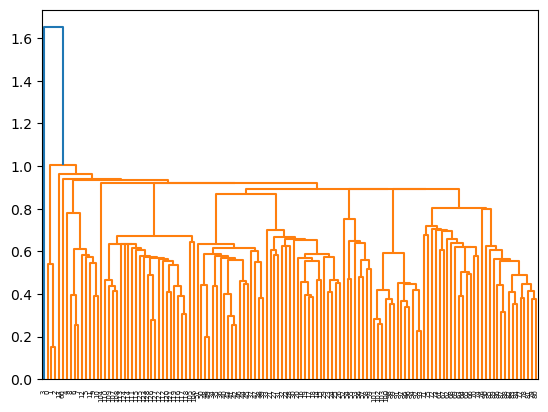

0.05
0.0 -1
0.06
0.0 -1
0.07
0.0 -1
0.08
0.0 -1
0.09
0.0 -1
0.1
0.0 -1
0.11
0.0 -1
0.12
0.0 -1
0.13
0.0 -1
0.14
0.0 -1
0.15
0.0 -1
0.16
0.5638547054926916 72.17340230306452
0.17
0.5638547054926916 72.17340230306452
0.18
0.5638547054926916 72.17340230306452
0.19
0.5638547054926916 72.17340230306452
0.2
1.316698889139371 95.04735661763561
0.21
1.316698889139371 95.04735661763561
0.22
1.316698889139371 95.04735661763561
0.23
2.192264650636068 109.00458705944443
0.24
2.192264650636068 109.00458705944443
0.25
2.192264650636068 109.00458705944443
0.26
4.16540708222368 121.01652779682617
0.27
5.215662416031442 125.01599897613104
0.28
6.340505146045421 132.015150645674
0.29
6.942939082097823 258.1240012087214
0.3
7.678132536601737 260.09421369957465
0.31
8.970581008849338 260.09421369957465
0.32
10.32626389875484 260.09421369957465
0.33
10.32626389875484 260.09421369957465
0.34
11.799164328576271 260.09421369957465
0.35
11.799164328576271 260.09421369957465
0.36
14.89860522978802 260.094213699

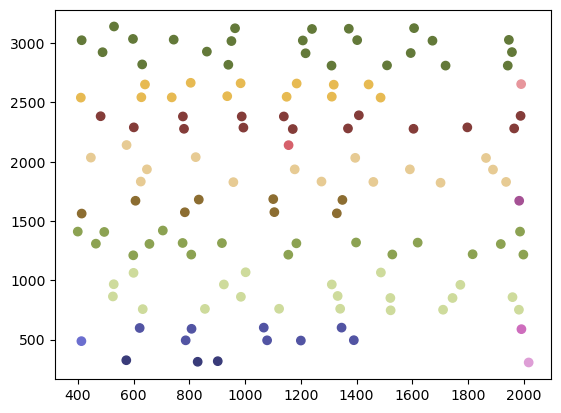

In [19]:
clusters = opt_thresh(center_points)

In [20]:
colormap = plt.cm.get_cmap('tab20b', len(np.unique(clusters)))

/tmp/ipykernel_114701/1270937618.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap('tab20b', len(np.unique(clusters)))


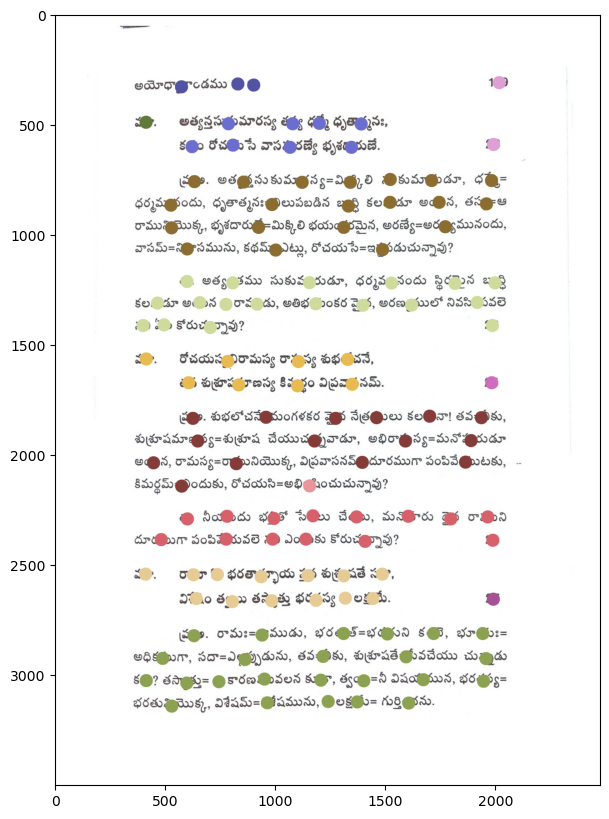

In [21]:
mid_pt_size = 30

img_2 = img.copy()

for i in range(len(center_points)):
    color = np.array(colormap(clusters[i])[:3]) * 255
    
    cv2.circle(img_2, center_points[i], mid_pt_size, color, -1)

plt.figure(figsize=(10, 10))
plt.imshow(img_2)

plt.show()

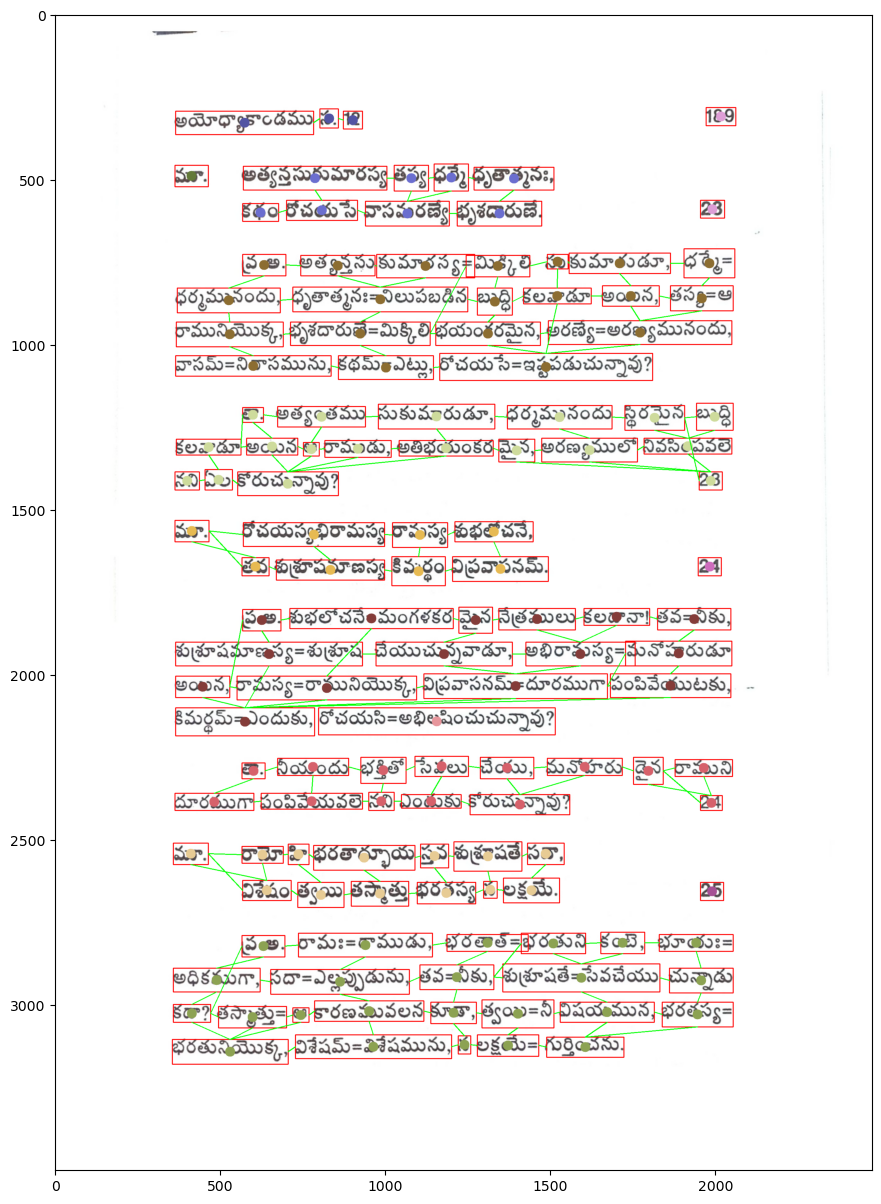

In [22]:
mid_pt_size = 15

img_2 = img.copy()

for i in range(len(center_points)): 
    
    # adding midpoint
    color = np.array(colormap(clusters[i])[:3]) * 255
    cv2.circle(img_2, center_points[i], mid_pt_size, color, -1)
    
    # adding bounding box - corners is l, r, t, b
    top_left = (corners[i][0], corners[i][2])
    bottom_right = (corners[i][1], corners[i][3])
    cv2.rectangle(img_2, top_left, bottom_right, (255, 0, 0), 2)
    
cluster_dict = {}
for i in np.unique(clusters):
    cluster_dict[i] = []
    
for i in range(len(center_points)):
    cluster_dict[clusters[i]].append(i)
    
for cluster in cluster_dict:
    for i in cluster_dict[cluster]:
        
        left_adj_pt, left_adj_dist = None, 1e9
        # right_adj_pt, right_adj_dist = None, 1e9
        # bot_adj_pt, bot_adj_dist = None, 1e9
        top_adj_pt, top_adj_dist = None, 1e9
        
        for j in cluster_dict[cluster]:
            # left adjacent - it's right should be <= left
            if corners[j][1] <= corners[i][0] and i != j:
                
                cur_dist = np.sqrt((corners[i][0] - corners[j][1])**2 + ((corners[j][2] + corners[j][3])/2 - (corners[i][2] + corners[i][3])/2)**2)
                                
                if cur_dist < left_adj_dist:
                    left_adj_dist = cur_dist
                    left_adj_pt = (corners[j][1], int((corners[j][2] + corners[j][3])/2))
                    
            # top adjacent - it's bottom should be >= top
            if corners[j][2] >= corners[i][3] and i != j:
                cur_dist = np.sqrt((corners[j][2] - corners[i][3])**2 + ((corners[j][0] + corners[j][1])/2 - (corners[i][0] + corners[i][1])/2)**2)

                if cur_dist < top_adj_dist:
                    top_adj_dist = cur_dist
                    top_adj_pt = (int((corners[j][0] + corners[j][1])/2), corners[j][2])
                    
        
        if left_adj_pt is not None:
            cv2.line(img_2, left_adj_pt, (corners[i][0], int((corners[i][2] + corners[i][3])/2)), (0, 255, 0), 2)

        if top_adj_pt is not None:
            cv2.line(img_2, top_adj_pt, (int((corners[i][0] + corners[i][1])/2), corners[i][3]), (0, 255, 0), 2)

plt.figure(figsize=(15, 15))
plt.imshow(img_2)

plt.show()
